# Supermarket sales analysis

<h2>Dataset</h2>

Unduh dataset yang akan digunakan: https://www.kaggle.com/aungpyaeap/supermarket-sales

<h2>Import Pustaka</h2>

In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

<h2>Data Loading</h2>

In [2]:
df = pd.read_csv("supermarket_sales - Sheet1.csv")
df

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1


<h2>Data Cleaning</h2>

In [3]:
df_stream = df.copy() # Menyalin dataframe agar dataframe original tidak berubah
df_stream = df_stream[(df_stream["Customer type"] == "Member")] # Menganalisis data yang berhubungan dengan member saja
df_stream.rename(columns={"gross income":"gross_income"}, inplace=True) # Mengganti nama kolom agar mempermudah pengkodingan dalam hipotesis
df_stream

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross_income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
6,355-53-5943,A,Yangon,Member,Female,Electronic accessories,68.84,6,20.6520,433.6920,2/25/2019,14:36,Ewallet,413.04,4.761905,20.6520,5.8
8,665-32-9167,A,Yangon,Member,Female,Health and beauty,36.26,2,3.6260,76.1460,1/10/2019,17:15,Credit card,72.52,4.761905,3.6260,7.2
9,692-92-5582,B,Mandalay,Member,Female,Food and beverages,54.84,3,8.2260,172.7460,2/20/2019,13:27,Credit card,164.52,4.761905,8.2260,5.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
988,267-62-7380,C,Naypyitaw,Member,Male,Electronic accessories,82.34,10,41.1700,864.5700,3/29/2019,19:12,Ewallet,823.40,4.761905,41.1700,4.3
989,430-53-4718,B,Mandalay,Member,Male,Health and beauty,75.37,8,30.1480,633.1080,1/28/2019,15:46,Credit card,602.96,4.761905,30.1480,8.4
994,652-49-6720,C,Naypyitaw,Member,Female,Electronic accessories,60.95,1,3.0475,63.9975,2/18/2019,11:40,Ewallet,60.95,4.761905,3.0475,5.9
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7


<h2>Eksplorasi Data</h2>

In [4]:
# Menentukan kuantitas jenis produk secara keseluruhan
df_stream1 = df_stream[["Product line", "Quantity"]].groupby(["Product line"]).sum()
df_stream1.sort_values(by = "Quantity", ascending = False)

,Quantity
Product line,
Food and beverages,506
Sports and travel,493
Home and lifestyle,490
Fashion accessories,439
Electronic accessories,429
Health and beauty,428


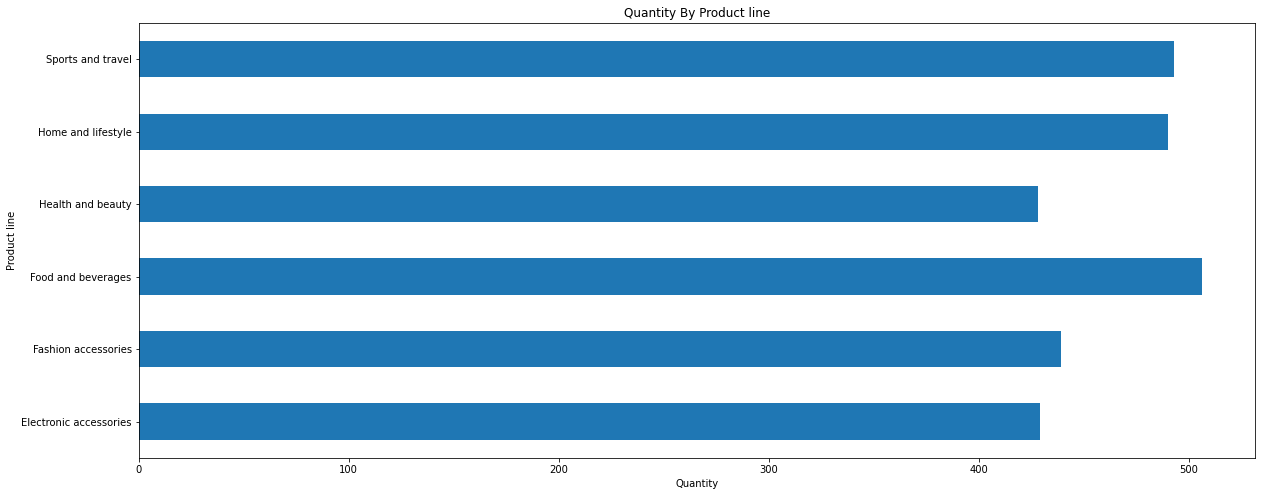

In [5]:
# Plot grafik sidebar
df_stream1['Quantity'].plot(kind='barh',
                            figsize=(20, 8)    
                            )

plt.xlabel('Quantity')
plt.title('Quantity By Product line')
plt.show()

In [6]:
# Menentukan kuantitas jenis produk per kota
df_stream2 = df_stream[["City", "Product line", "Quantity"]].groupby(["City", "Product line"]).sum()
df_stream2.sort_values(by = ["City", "Quantity"], ascending = False)

Quantity
City      Product line                    
Yangon    Home and lifestyle           210
          Sports and travel            177
          Electronic accessories       162
          Food and beverages           153
          Fashion accessories          133
          Health and beauty            129
Naypyitaw Food and beverages           193
          Fashion accessories          163
          Sports and travel            151
          Home and lifestyle           143
          Health and beauty            127
          Electronic accessories       120
Mandalay  Health and beauty            172
          Sports and travel            165
          Food and beverages           160
          Electronic accessories       147
          Fashion accessories          143
          Home and lifestyle           137

In [7]:
# Merapikan data untuk membuat grafik
df_stream2_1 = df_stream.copy()
df_stream2_1 = df_stream2_1.drop(['Invoice ID', 'Branch', 'Customer type', 'Gender', 'Unit price', 'Tax 5%', 'Total', 'Date', 'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross_income', 'Rating'], axis=1)
df_stream2_1

,City,Product line,Quantity
0,Yangon,Health and beauty,7
3,Yangon,Health and beauty,8
6,Yangon,Electronic accessories,6
8,Yangon,Health and beauty,2
9,Mandalay,Food and beverages,3
...,...,...,...
988,Naypyitaw,Electronic accessories,10
989,Mandalay,Health and beauty,8
994,Naypyitaw,Electronic accessories,1
997,Yangon,Food and beverages,1


In [8]:
# Merapikan data untuk membuat grafik
df_stream2_2 = df_stream2_1.pivot_table(index='City', columns='Product line', values='Quantity', aggfunc=np.sum)
df_stream2_2

Product line,Electronic accessories,Fashion accessories,Food and beverages,Health and beauty,Home and lifestyle,Sports and travel
City,,,,,,
Mandalay,147,143,160,172,137,165
Naypyitaw,120,163,193,127,143,151
Yangon,162,133,153,129,210,177


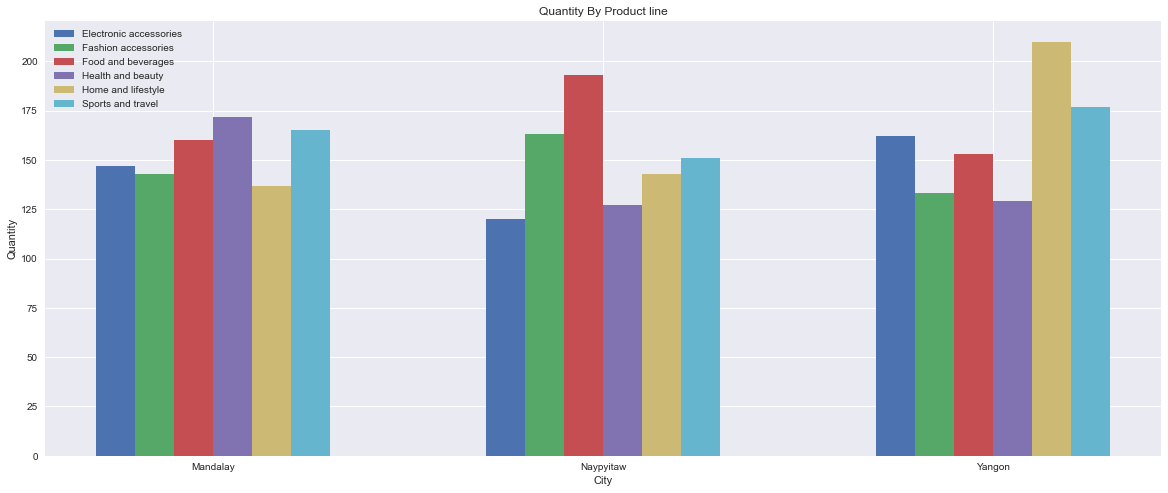

In [9]:
# Plot grafik bar
label2_2 = list(df_stream2_2.index)

x2_2 = np.arange(len(label2_2))
y2_2_1 = df_stream2_2['Electronic accessories']
y2_2_2 = df_stream2_2['Fashion accessories']
y2_2_3 = df_stream2_2['Food and beverages']
y2_2_4 = df_stream2_2['Health and beauty']
y2_2_5 = df_stream2_2['Home and lifestyle']
y2_2_6 = df_stream2_2['Sports and travel']

with plt.style.context('seaborn'):
    fig, ax = plt.subplots(figsize=(20,8))
    ax.bar(x2_2 + 0, y2_2_1, width = 0.1, label = 'Electronic accessories')
    ax.bar(x2_2 + 0.1, y2_2_2, width = 0.1, label = 'Fashion accessories')
    ax.bar(x2_2 + 0.2, y2_2_3, width = 0.1, label = 'Food and beverages')
    ax.bar(x2_2 + 0.3, y2_2_4, width = 0.1, label = 'Health and beauty')
    ax.bar(x2_2 + 0.4, y2_2_5, width = 0.1, label = 'Home and lifestyle')
    ax.bar(x2_2 + 0.5, y2_2_6, width = 0.1, label = 'Sports and travel')
    ax.set_xlabel('City')
    ax.set_ylabel('Quantity')
    ax.set_xticks(x2_2 + 0.25)
    ax.set_xticklabels(label2_2)
    ax.set_title('Quantity By Product line')
    plt.legend()
    plt.show()

In [10]:
# Menentukan rata-rata pendapatan kotor untuk jenis produk secara keseluruhan
df_stream3 = df_stream[["Product line", "gross_income"]].groupby(["Product line"]).mean()
df_stream3.sort_values(by = "gross_income", ascending = False)

,gross_income
Product line,
Health and beauty,16.849993
Home and lifestyle,16.051651
Food and beverages,15.885319
Sports and travel,15.453914
Electronic accessories,14.956346
Fashion accessories,14.575837


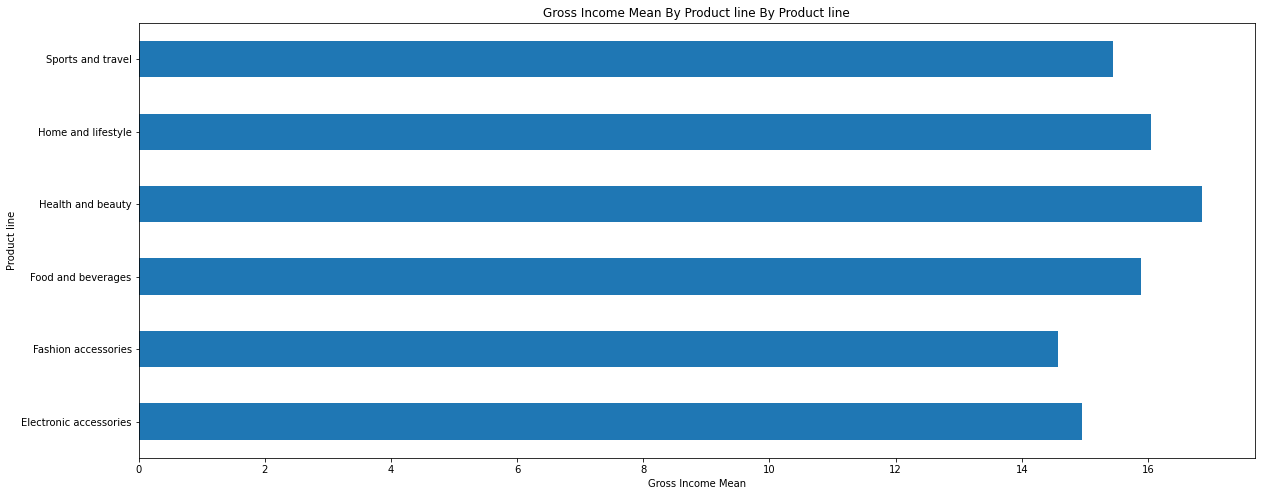

In [11]:
# Plot grafik sidebar
df_stream3['gross_income'].plot(kind='barh',
                            figsize=(20, 8)     
                            )

plt.xlabel('Gross Income Mean')
plt.title('Gross Income Mean By Product line By Product line')
plt.show()

In [12]:
# Menentukan rata-rata pendapatan kotor untuk jenis produk per kota
df_stream4 = df_stream[["City", "Product line", "gross_income"]].groupby(["City", "Product line"]).mean()
df_stream4.sort_values(by = ["City", "gross_income"], ascending = False)

gross_income
City      Product line                        
Yangon    Home and lifestyle         17.585853
          Sports and travel          15.889914
          Fashion accessories        15.027227
          Food and beverages         14.576448
          Electronic accessories     14.048677
          Health and beauty          13.937000
Naypyitaw Electronic accessories     18.876075
          Fashion accessories        17.919422
          Food and beverages         17.271750
          Health and beauty          15.360620
          Sports and travel          13.838929
          Home and lifestyle         13.014321
Mandalay  Health and beauty          20.746923
          Home and lifestyle         17.617476
          Sports and travel          16.539767
          Food and beverages         15.473103
          Electronic accessories     13.094981
          Fashion accessories        10.921922

In [13]:
# Merapikan data untuk membuat grafik
df_stream4_1 = df_stream.copy()
df_stream4_1 = df_stream4_1.drop(['Invoice ID', 'Branch', 'Customer type', 'Gender', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date', 'Time', 'Payment', 'cogs', 'gross margin percentage', 'Rating'], axis=1)
df_stream4_1

,City,Product line,gross_income
0,Yangon,Health and beauty,26.1415
3,Yangon,Health and beauty,23.2880
6,Yangon,Electronic accessories,20.6520
8,Yangon,Health and beauty,3.6260
9,Mandalay,Food and beverages,8.2260
...,...,...,...
988,Naypyitaw,Electronic accessories,41.1700
989,Mandalay,Health and beauty,30.1480
994,Naypyitaw,Electronic accessories,3.0475
997,Yangon,Food and beverages,1.5920


In [14]:
# Merapikan data untuk membuat grafik
df_stream4_2 = df_stream4_1.pivot_table(index='City', columns='Product line', values='gross_income')
df_stream4_2

Product line,Electronic accessories,Fashion accessories,Food and beverages,Health and beauty,Home and lifestyle,Sports and travel
City,,,,,,
Mandalay,13.094981,10.921922,15.473103,20.746923,17.617476,16.539767
Naypyitaw,18.876075,17.919422,17.271750,15.360620,13.014321,13.838929
Yangon,14.048677,15.027227,14.576448,13.937000,17.585853,15.889914


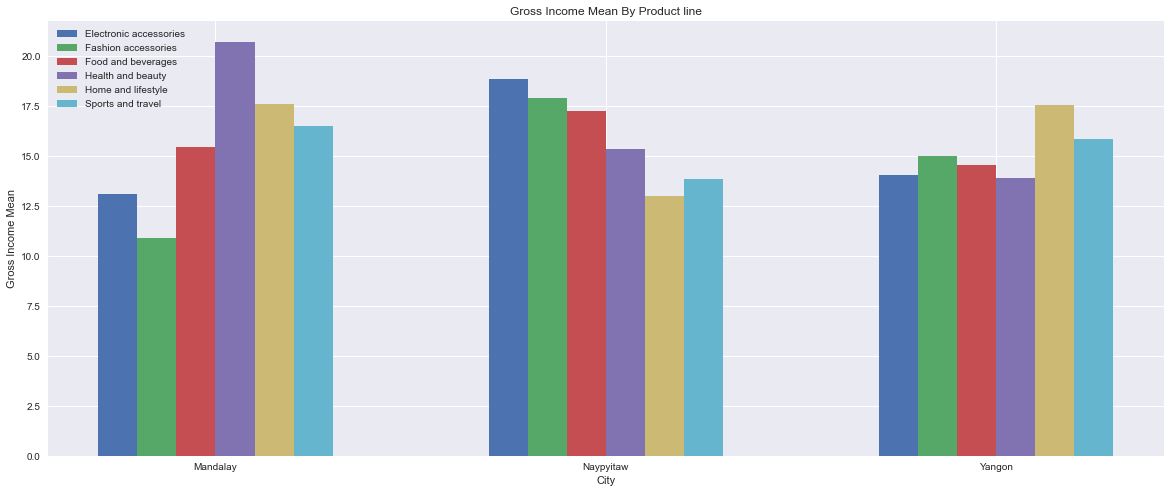

In [15]:
# Plot grafik bar
label4_2 = list(df_stream4_2.index)

x4_2 = np.arange(len(label4_2))
y4_2_1 = df_stream4_2['Electronic accessories']
y4_2_2 = df_stream4_2['Fashion accessories']
y4_2_3 = df_stream4_2['Food and beverages']
y4_2_4 = df_stream4_2['Health and beauty']
y4_2_5 = df_stream4_2['Home and lifestyle']
y4_2_6 = df_stream4_2['Sports and travel']

with plt.style.context('seaborn'):
    fig, ax = plt.subplots(figsize=(20,8))
    ax.bar(x4_2 + 0, y4_2_1, width = 0.1, label = 'Electronic accessories')
    ax.bar(x4_2 + 0.1, y4_2_2, width = 0.1, label = 'Fashion accessories')
    ax.bar(x4_2 + 0.2, y4_2_3, width = 0.1, label = 'Food and beverages')
    ax.bar(x4_2 + 0.3, y4_2_4, width = 0.1, label = 'Health and beauty')
    ax.bar(x4_2 + 0.4, y4_2_5, width = 0.1, label = 'Home and lifestyle')
    ax.bar(x4_2 + 0.5, y4_2_6, width = 0.1, label = 'Sports and travel')
    ax.set_xlabel('City')
    ax.set_ylabel('Gross Income Mean')
    ax.set_xticks(x4_2 + 0.25)
    ax.set_xticklabels(label4_2)
    ax.set_title('Gross Income Mean By Product line')
    plt.legend()
    plt.show()

<h2>Hypothesis Testing</h2>

Berdasarkan jumlah kuantitas jenis produk, "Food and beverages" adalah produk paling banyak dibeli oleh member dan "Health and beauty" adalah produk paling sedikit dibeli oleh member, dan selisih diantara keduanya cukup besar. Namun, berdasarkan rata-rata pendapatan kotornya, selisih antara keduanya tidak terlalu jauh. Hal ini menimbulkan pertanyaan, "Apakah selisih rata-rata pendapatan kotor tersebut signifikan?", dan pertanyaan tersebut bisa dijawab dengan melakukan pengujian hipotesis pada kedua data tersebut.

Pengujian hipotesis yang dilakukan menggunakan metode **"Two Samples Independent Two Tailed Hypothesis Testing"** dengan hipotesis

**H0: μ_food_and_beverages = μ_health_and_beauty**,

**H1: μ_food_and_beverages != μ_health_and_beauty**.

In [16]:
# Mencari nilai μ_health_and_beauty
df_hb = df_stream[df_stream['Product line'] == 'Health and beauty'][['Invoice ID','gross_income']].groupby('Invoice ID').sum()
df_hb.gross_income.mean()

16.849993150684934

In [17]:
# μ_food_and_beverages
df_fb = df_stream[df_stream['Product line'] == "Food and beverages"][['Invoice ID','gross_income']].groupby('Invoice ID').sum()
df_fb.gross_income.mean()

15.885319148936167

In [18]:
# Menghitung nilai t-statistics dan P-value
t_stat, p_val = stats.ttest_ind(df_hb,df_fb)
print('P-value:',p_val[0]) #the p-value isn't divided by 2 since the output is two-sided p-value
print('t-statistics:',t_stat[0])

P-value: 0.6104774437483318
t-statistics: 0.5103655869847533


D:\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


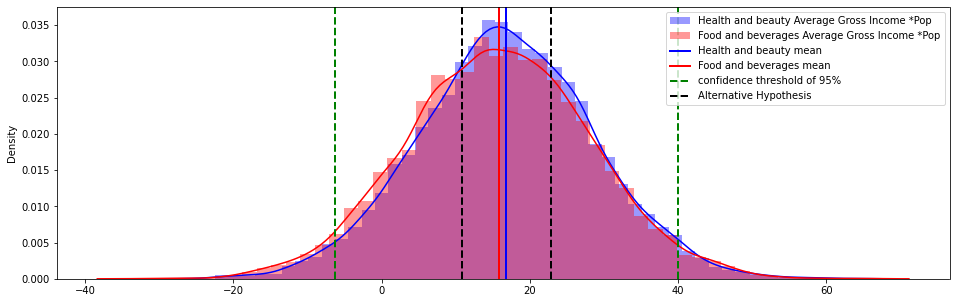

In [19]:
# Plot grafik hasil pengujian hipotesis
hb_pop = np.random.normal(df_hb.gross_income.mean(),df_hb.gross_income.std(),10000)
fb_pop = np.random.normal(df_fb.gross_income.mean(),df_fb.gross_income.std(),10000)

ci = stats.norm.interval(0.95, df_hb.gross_income.mean(), df_hb.gross_income.std())
plt.figure(figsize=(16,5))
sns.distplot(hb_pop, label='Health and beauty Average Gross Income *Pop',color='blue')
sns.distplot(fb_pop, label='Food and beverages Average Gross Income *Pop',color='red')

plt.axvline(df_hb.gross_income.mean(), color='blue', linewidth=2, label='Health and beauty mean')
plt.axvline(df_fb.gross_income.mean(), color='red',  linewidth=2, label='Food and beverages mean')

plt.axvline(ci[1], color='green', linestyle='dashed', linewidth=2, label='confidence threshold of 95%')
plt.axvline(ci[0], color='green', linestyle='dashed', linewidth=2)

plt.axvline(hb_pop.mean()+t_stat[0]*hb_pop.std(), color='black', linestyle='dashed', linewidth=2, label = 'Alternative Hypothesis')
plt.axvline(hb_pop.mean()-t_stat[0]*hb_pop.std(), color='black', linestyle='dashed', linewidth=2)

plt.legend()

Kesimpulan:
- Distribusi kedua data yang diuji merupakan distribusi normal.
- **H0** dapat diterima, yang berarti tidak ada perbedaan signifikan antara rata-rata pendapatan kotor "Food and beverages" dengan rata-rata pendapatan kotor "Health and beauty". Hal ini karena:
    - P-value jauh lebih besar dibandingkan critical value (0.05).
    - Garis "Alternative Hypothesis" berada di dalam jangkauan garis "Confidence threshold".

URL Heroku = https://naadam-batch07.herokuapp.com/